In [3]:
import tensorflow as tf

model = tf.keras.models.load_model("/content/tracefinder_model.h5")
print("Model loaded successfully")


Model loaded successfully


Model loaded successfully
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


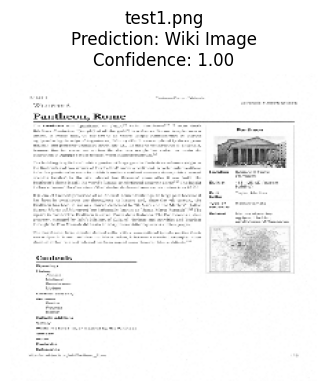

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


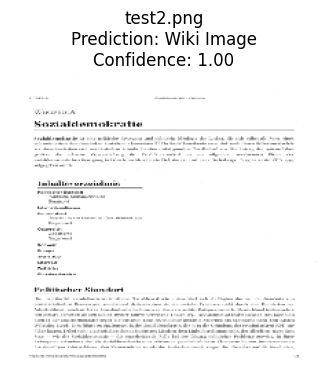

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


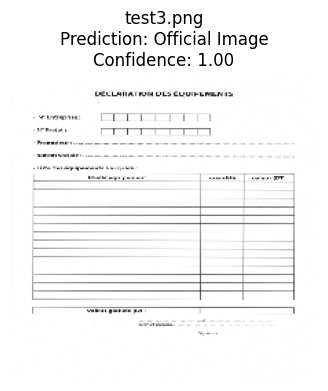

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load trained model
model = tf.keras.models.load_model("/content/tracefinder_model.h5")
print("Model loaded successfully")

IMG_SIZE = (224, 224)

def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]

    if prediction > 0.5:
        label = "Wiki Image"
        confidence = prediction
    else:
        label = "Official Image"
        confidence = 1 - prediction

    return label, confidence, img


# 🔹 List of test images
test_images = [
    "/content/test1.png",
    "/content/test2.png",
    "/content/test3.png"
]

# 🔹 Run prediction on all images
for img_path in test_images:
    label, confidence, img = predict_image(img_path)

    plt.figure(figsize=(4,4))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{img_path.split('/')[-1]}\nPrediction: {label}\nConfidence: {confidence:.2f}")
    plt.show()
